In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import sgfrd

Declaring Species and ReactionRules:

In [2]:
with species_attributes():
    A | {'D': 1.0, 'radius': 0.005}
    B | {'D': 1.0, 'radius': 0.005}

with reaction_rules():
    A > A + A | 1.0
    A + B > B | 1.0

m = get_model()

Then make a world. By default, it constructs a planar surface.

You can also pass a polygon as an STL file to `Factory` through `SGFRDFactory.polygon(filename, STLFormat)`.

In [3]:
f = sgfrd.Factory(Integer3(10, 10, 10)) # set resolution of the plane
w = f.world(Real3(10.0, 10.0, 10.0))    # set size of the simulation box
w.bind_to(m)

In [4]:
w.add_molecules(Species("A"), 1000)
w.add_molecules(Species("B"), 1000)

In [5]:
sim = f.simulator(w, m)

obs1 = FixedIntervalNumberObserver(0.001)
obs2 = FixedIntervalHDF5Observer(0.002, "sgfrd%03d.h5")

sim.run(0.1, (obs1, obs2))

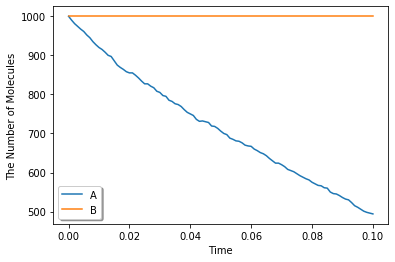

In [6]:
show(obs1)

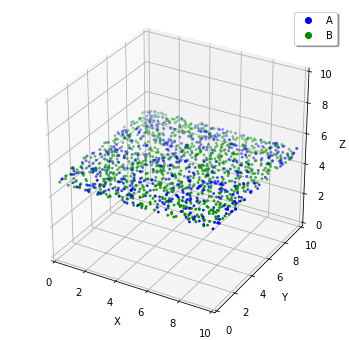

In [7]:
import ecell4.util.viz
ecell4.util.viz.plot_world(w, interactive=False)

In [8]:
ecell4.util.viz.plot_movie_with_matplotlib([sgfrd.SGFRDWorld("sgfrd%03d.h5" % i) for i in range(obs2.num_steps())])